<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/Adult_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
from  sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report
from sklearn import svm
from numpy.random import seed
RAND=2231 # should be your student code abcd
seed(RAND)

from https://drive.google.com/file/d/1-jrwZmZ3kqH-3JbckqbxEsr7EjW27IDJ/view?usp=sharing copy file archive.zip to your folder.

In [179]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive.zip')

In [180]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [181]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**About the Dataset**
```*Age: Describes the age of individuals. Continuous.
Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: Continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: Number of years spent in education. Continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: Continuous.
capital-loss: Continuous.
hours-per-week: Continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
salary: >50K,<=50K  ---- CLASSIFICATION Target

```



In [182]:
exclude_atribute=[ "fnlwgt", 'education.num', 'capital.gain', 'capital.loss']
for att in exclude_atribute:
  del df[att]
df.head()


,age,workclass,education,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,?,HS-grad,Widowed,?,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,?,Some-college,Widowed,?,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K


In [183]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   marital.status  32561 non-null  object
 4   occupation      30718 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours.per.week  32561 non-null  int64 
 9   native.country  31978 non-null  object
 10  income          32561 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.7+ MB


Observation:
```
We can see that the columns workclass, occupation, and native.country contains null values. We would have to find out a way to deal with them!
There can be many ways to impute missing values, but right now, for the sake of simplicity we would impute them using mode!
```



In [184]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

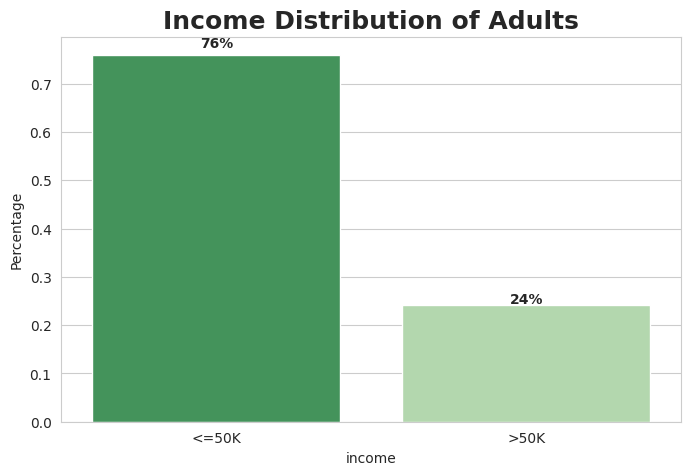

In [185]:
#Before beginning, let us understand a bit about our data.
# to see more statistics wisit https://www.kaggle.com/code/aditimulye/adult-income-dataset-from-scratch
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

Data preparation for a model implementation

In [186]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country','income']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(df[col])
    le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(le_name_mapping)
    df[col] = label_encoder.transform(df[col])

from sklearn.model_selection import train_test_split
X_orig = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'hours.per.week']]
y = df['income']

{'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7}
{'10th': 0, '11th': 1, '12th': 2, '1st-4th': 3, '5th-6th': 4, '7th-8th': 5, '9th': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, 'Bachelors': 9, 'Doctorate': 10, 'HS-grad': 11, 'Masters': 12, 'Preschool': 13, 'Prof-school': 14, 'Some-college': 15}
{'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}
{'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}
{'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}
{'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White':

In [187]:
X_orig.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,age,hours.per.week
0,3,11,6,9,1,4,0,38,90,40
1,3,11,6,3,1,4,0,38,82,18
2,3,15,6,9,4,2,0,38,66,40
3,3,5,0,6,4,4,0,38,54,40
4,3,15,5,9,3,4,0,38,41,40


In [188]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [189]:
X_orig.describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,age,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,3.094438,10.298210,2.611836,6.138755,1.446362,3.665858,0.669205,36.417155,38.581647,40.437456
std,1.107194,3.870264,1.506222,3.972708,1.606771,0.848806,0.470506,6.056047,13.640433,12.347429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,1.000000
25%,3.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,38.000000,28.000000,40.000000
50%,3.000000,11.000000,2.000000,6.000000,1.000000,4.000000,1.000000,38.000000,37.000000,40.000000
75%,3.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,38.000000,48.000000,45.000000
max,7.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,40.000000,90.000000,99.000000


#lets split data and do input feature transform.

In [190]:
X_tr, X_te, y_train, y_test = train_test_split(X_orig, y, test_size=0.3, random_state=RAND, shuffle=True, stratify=y)


#T-distributed Stochastic Neighbor Embedding.




<ipython-input-191-d16f32499c6a>:6: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=X_train_tsne[:,0], y=X_train_tsne[:,1], hue=y_test,


[Text(0.5, 1.0, 'Adult data T-SNE projection')]

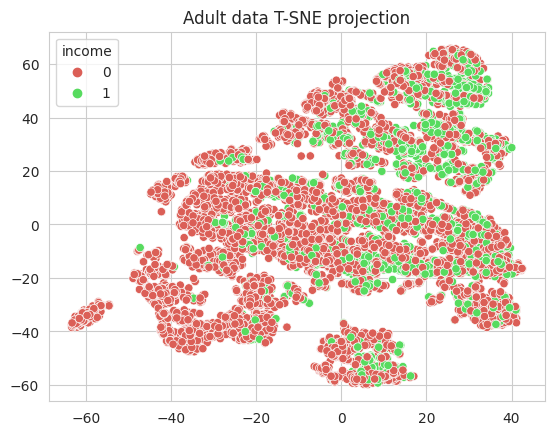

In [191]:
from sklearn.manifold import TSNE
sklearn_tsne = TSNE( n_components=2, perplexity=100)

X_train_tsne = sklearn_tsne.fit_transform(X_te)
import seaborn as sns
sns.scatterplot(x=X_train_tsne[:,0], y=X_train_tsne[:,1], hue=y_test,
                palette=sns.color_palette("hls", 3)).set(title="Adult data T-SNE projection")

[Text(0.5, 1.0, 'Adult data T-SNE projection marital.status')]

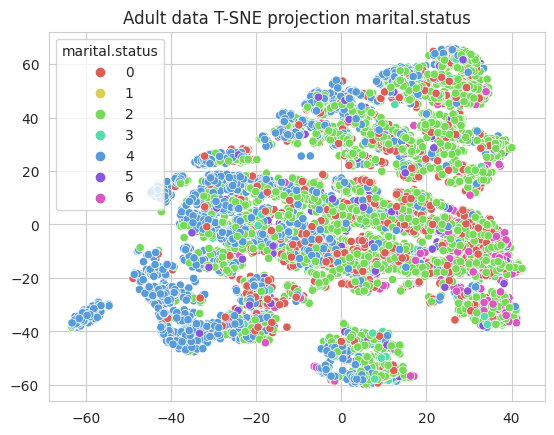

In [192]:
sns.scatterplot(x=X_train_tsne[:,0], y=X_train_tsne[:,1], hue=X_te['marital.status'],
                palette=sns.color_palette("hls", 7)).set(title="Adult data T-SNE projection marital.status")

[Text(0.5, 1.0, 'Adult data T-SNE projection education')]

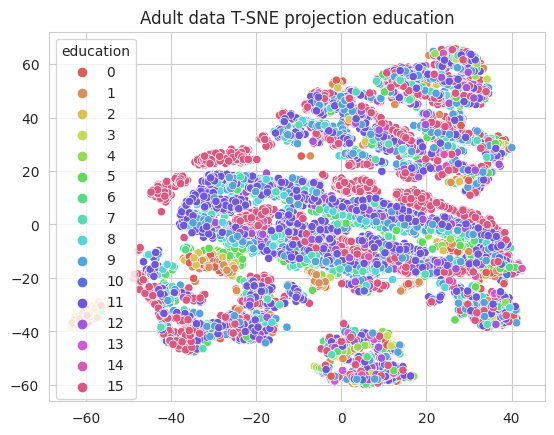

In [193]:
sns.scatterplot(x=X_train_tsne[:,0], y=X_train_tsne[:,1], hue=X_te['education'],
                palette=sns.color_palette("hls", 16)).set(title="Adult data T-SNE projection education")

[Text(0.5, 1.0, 'Adult data T-SNE projection relationship')]

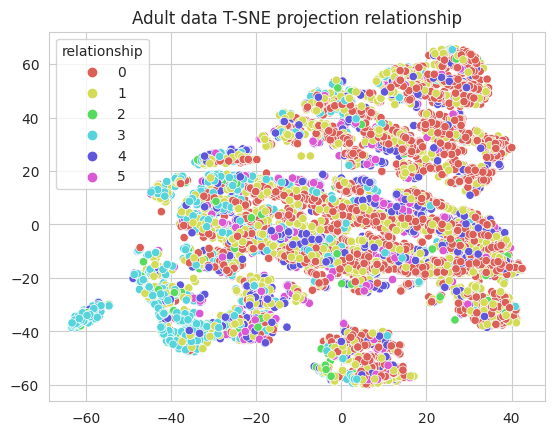

In [194]:
sns.scatterplot(x=X_train_tsne[:,0], y=X_train_tsne[:,1], hue=X_te['relationship'],
                palette=sns.color_palette("hls", 6)).set(title="Adult data T-SNE projection relationship")

[Text(0.5, 1.0, 'Adult data T-SNE projection native.country')]

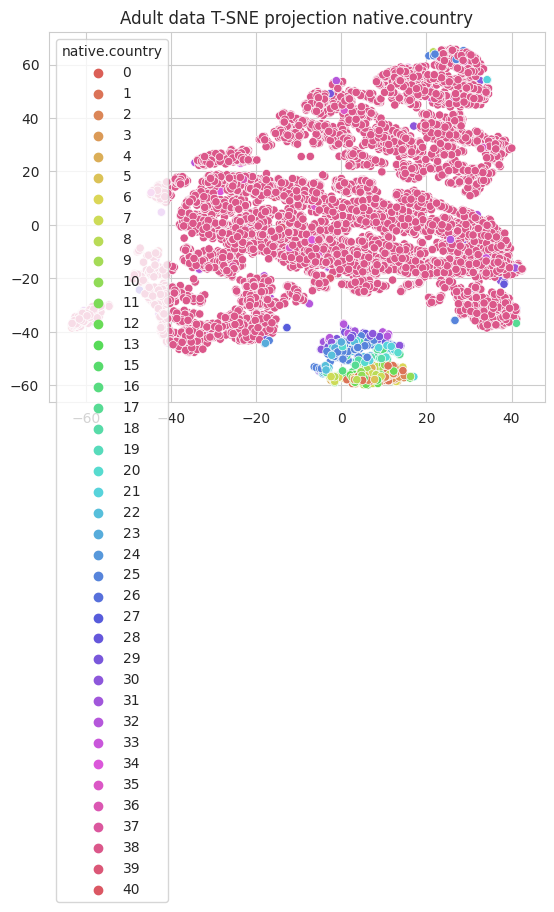

In [195]:
sns.scatterplot(x=X_train_tsne[:,0], y=X_train_tsne[:,1], hue=X_te['native.country'],
                palette=sns.color_palette("hls", 40)).set(title="Adult data T-SNE projection native.country")

Data preprocessing

In [196]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_tr)
X_train=scaler.transform(X_tr)
X_test=scaler.transform(X_te)

## Lets implement the base line model. Your model should work much better :)

In [197]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
scores_nb=metrics.accuracy_score(y_test,y_pred)
print("Base line accuracy = ", scores_nb)

Base line accuracy =  0.7590336779608967


In [198]:
#saving model for latter use
from joblib import dump, load
dump(nb_model,'naive_Bayes_clasifier.joblib')

['naive_Bayes_clasifier.joblib']

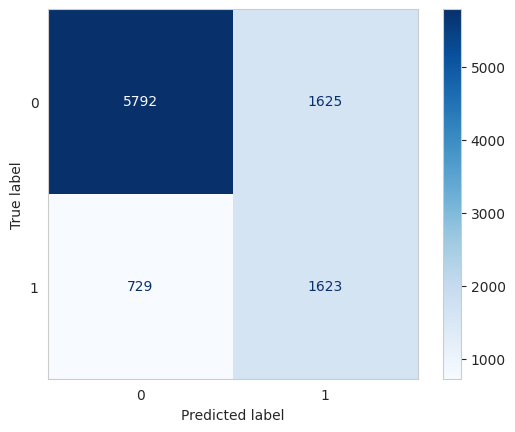

In [199]:
# Plot Confusion matrix
classes = None
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp = disp.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')

plt.grid(False)
plt.show()

In [200]:
print("Base line Naive Baies metrics:")
print("- Accuracy  = %.3f" % accuracy_score(y_test, y_pred))
print("- ROC AUC   = %.3f" % roc_auc_score(y_test, y_pred))
# compute the classification report
print(classification_report(y_test, y_pred))

Base line Naive Baies metrics:
- Accuracy  = 0.759
- ROC AUC   = 0.735
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      7417
           1       0.50      0.69      0.58      2352

    accuracy                           0.76      9769
   macro avg       0.69      0.74      0.71      9769
weighted avg       0.79      0.76      0.77      9769



-----------------------------------------------------------------------
**Now, let's build your model; better than the base line.**
-----------------------------------------------------------------------

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc_model = DecisionTreeClassifier(random_state=123, max_depth=3)
dtc_model.fit(X_tr, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [202]:
X_orig.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'age',
       'hours.per.week'],
      dtype='object')

In [203]:
label_encoder.classes_

array(['<=50K', '>50K'], dtype=object)

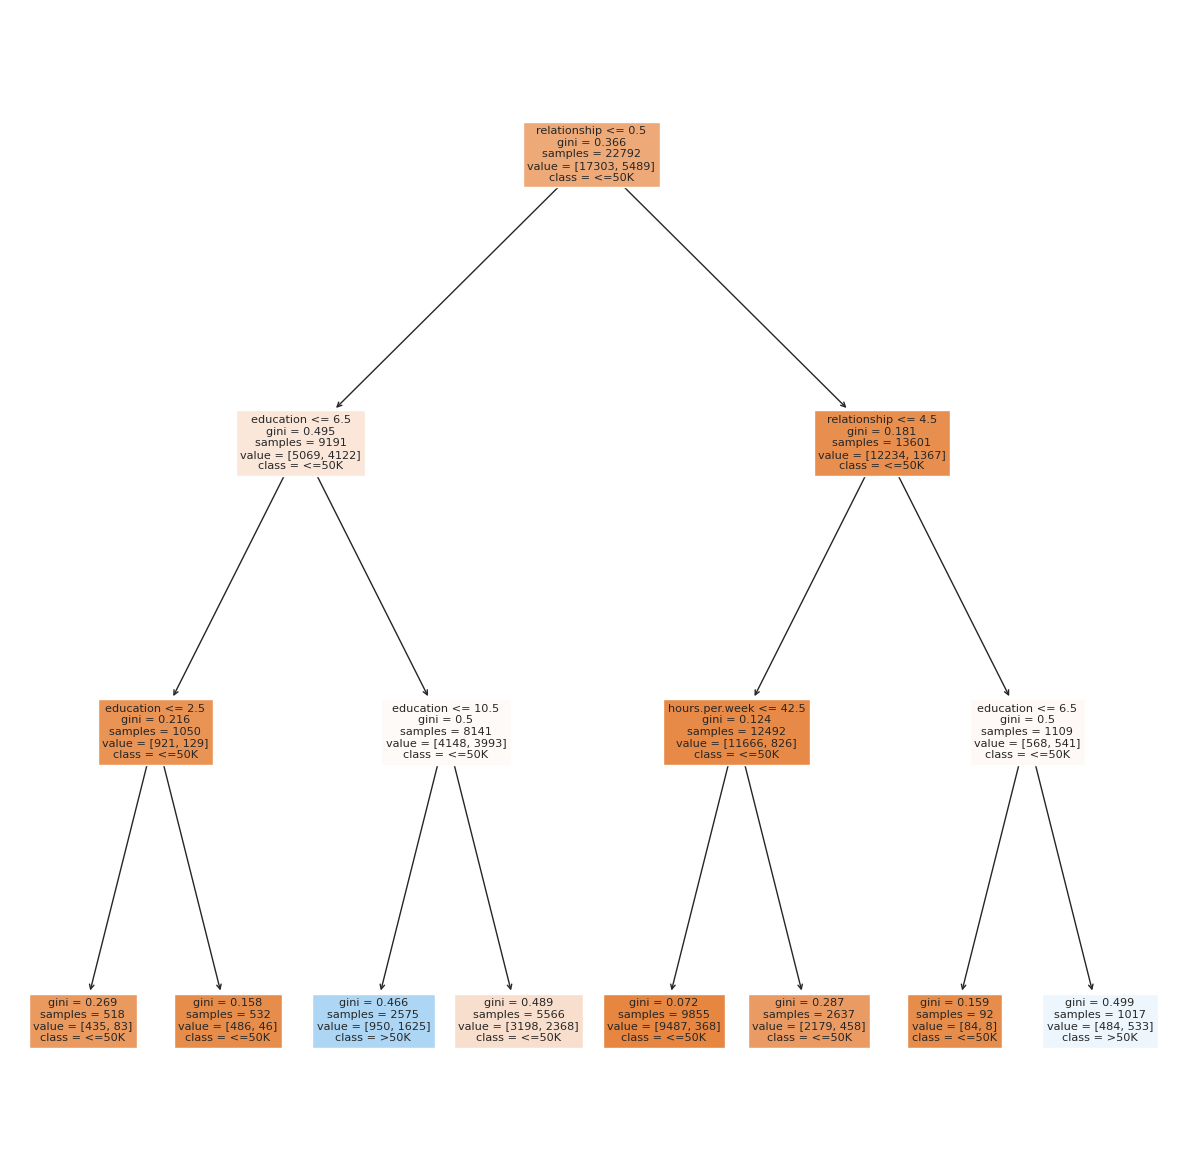

In [211]:

fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(dtc_model,
                   feature_names=X_orig.columns,
                   class_names=eda_percentage['income'],
                   filled=True)

Random Forest classifies

In [205]:
dtc_1 = RandomForestClassifier(random_state=123)
dtc_1.fit(X_train, y_train)
y_pred = dtc_1.predict(X_test)
scores_dtc_1=metrics.accuracy_score(y_test,y_pred)
print('Acc_RandomForestClassifier = ', scores_dtc_1)

Acc_RandomForestClassifier =  0.8178933360630566


Bagging classifier

In [206]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


# bagging classifier
model = BaggingClassifier(random_state = 123)
model_b = model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model_b.predict(X_test)
scores_abc=metrics.accuracy_score(y_test,y_pred)
print('Acc_BaggingClassifier = ', scores_abc)

Acc_BaggingClassifier =  0.8029481011362473


Adaboost classifier

In [207]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier()
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
scores_abc=metrics.accuracy_score(y_test,y_pred)
print('Acc_AdaBoostClassifier = ', scores_abc)

Acc_AdaBoostClassifier =  0.8350905926911659


XGboost

In [208]:
from xgboost import XGBClassifier
# fit model no training data
xgbc = XGBClassifier( n_estimators=51, max_depth =5)
xgbc.fit(X_train, y_train)
# make predictions for test data
y_pred = xgbc.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, predictions)
print("XGBClassifier Accuracy: " ,accuracy)

XGBClassifier Accuracy:  0.839594636093766


In [209]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
# - cross validataion
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

ypred = xgbc.predict(X_test)
cm = confusion_matrix(y_test,ypred)
print(cm)

Mean cross-validation score: 0.84
K-fold CV average score: 0.84
[[6838  579]
 [ 988 1364]]


In [210]:
scores

array([0.84163194, 0.83921913, 0.8374287 , 0.83391839, 0.84050022])